# Classical motion of mercury
## Modeling
Let $m$ be the mass of mercury, $M$ the mass of the sun and $G$ the gravitational constant. We will use heliocentric coordinates so that the position of the sun is always $(0,0)$ and the position of Mercury will be denoted $(q_1,q_2)$. 
* The Kinetic energy of the system is $K(\dot{q})=\frac{1}{2}m||\dot{q}||^2$.
* The Potential energy of the system is $U(q)=\frac{-GmM}{||q||}$.
* The total energy of the system is $H=K+U=\frac{1}{2}m||\dot{q}||^2 -\frac{GmM}{||q||}$.

## Nondimensionalization
We introduce the following dimensionless quantities: dimensionless time $\bar{t}=t/T$ with $\frac{1}{T}=\sqrt{\frac{GM}{D^3}}$ (where $D$ is the perihelion of Mercury); dimensionless coordinates $\bar{q}=q/D$; and dimensionless energy $\bar{H} = \frac{H}{E_0}$, where $E_0=\frac{mMG}{D}$. 

The dimensionless mechanical system is then seen to have a Hamiltonian which reads (omitting the bars)
$$H(q,p)= \frac{1}{2}(p_1^2+p_2^2) - \frac{1}{\sqrt{q_1^2+q_2^2}}.$$
Since in these rescaled units the mass is unity, the momenta and the velocities coincide: $p=\dot{q}$.
Note that one unit of rescaled time corresponds roughly to 10 earth days. 

## Equations of motion
\begin{equation}
\left\lbrace
\begin{array}{ccc}
\dot{q}&=&p \\
\dot{p}&=&-\frac{1}{||q||^3}q
\end{array}
\right.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
# Constantes physiques
G=6.67408e-11 #m^3 kg^-1 s^-2
m = 3.285e+23 #mass of mercury in kg
M = 1.989e30 #mass of the sun kg
D = 46001200*1000 #perihelion of mercury in m
T = np.sqrt(D**3/(M*G)) #time scale
print 265.25*24*3600/T #One earth year corresponds to 26 units of rescaled time
e = 0.205630 #eccentricity as measured by nasa in nov 2007
# Temps pendant lequel on veut simuler le systeme
years = 100.
tbarf = years*365.25*24*3600./T#final rescaled time, corresponding to N earth years 
print tbarf
#Initial conditions:
q1init, q2init = 1., 0.
p1init, p2init = 0., T/D*56.6e3
print p2init
x0 = np.array([q1init,q2init,p1init,p2init])
#Dynamics right hand side x=(q1,q2,p1,p2), t=time (all rescaled)
def f(x,t):
    return np.concatenate((x[2:4],-np.linalg.norm(x[0:2])**(-3) * x[0:2]))
                          #-mu*np.linalg.norm(x[0:2])**(-5) * x[0:2]))

26.7626114716
3685.21916683
1.05362948631


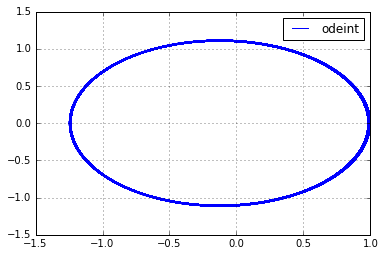

In [3]:
#Integration avec odeint de scipy, c'est une methode de Adams-Bashforth
times = np.linspace(0,tbarf,10000)
states = odeint(f, x0, times)
plt.plot(states[:,0],states[:,1],'b-',label='odeint')
plt.legend()
plt.grid()

In [4]:
H = lambda x: 0.5*(x[2:4].dot(x[2:4])) - 1./np.linalg.norm(x[0:2])
Harray = np.array([H(xs) for xs in states])

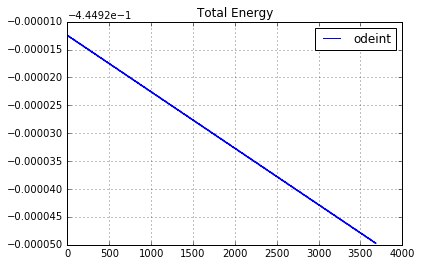

In [5]:
plt.plot(times, Harray, label='odeint')
plt.title('Total Energy')
plt.grid()
plt.legend()

In [6]:
#Methode a pas separes du TD, changer les valeurs des coeffs alpha, 
# beta et gamma pour observer le comportement (consistence, ordre, stabilite)
def phi_mps(x,t,h):
    alpha=0
    gamma,beta =0.5,0.5
    return beta*f(x,t) +gamma*f(x +alpha*h*f(x,t), t+alpha*h)    
# Euler Explicite
def phi_explicit_euler(x,t,h):
    return f(x,t)
# RK2 avec coefficients classiques
def phi_rk2(x,t,h): #beta=0,gamma =1 , alpha=1/2 
    return f(x +h/2.*f(x,t), t+h/2.) 
# Integrateur
def integ(phi, tf, h):
    t, sol = 0., [x0]
    times=[0.]
    while t +h/2. < tf:
        x=sol[-1]
        sol.append(x + h*phi(x,t,h))
        t+=h
        times.append(t)
    return np.array(sol), times

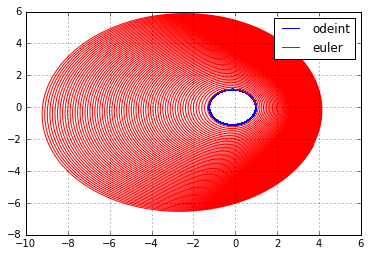

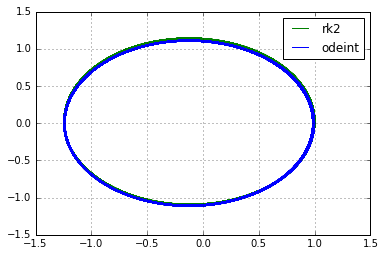

In [8]:
## Integration
h=0.01
TF = tbarf
euler_states, euler_times = integ(phi_explicit_euler,TF,h) #euler
rk2_states, rk2_times = integ(phi_rk2,TF,h) #rk2 classique
#mps_states, mps_times = integ(phi_mps,TF,h) #methode du TD

#Affichage
plt.plot(states[:,0],states[:,1],label='odeint') #solution avec LSODA
plt.plot(euler_states[:,0],euler_states[:,1],'r-',label='euler') #solution euler
#plt.plot(mps_states[:,0], mps_states[:,1],label='mps') #solution methode TD2
plt.legend()
plt.grid()
plt.show()
plt.plot(rk2_states[:,0],rk2_states[:,1],'g-',label='rk2') #solution rk2
plt.plot(states[:,0],states[:,1],label='odeint') #solution avec LSODA
plt.legend()
plt.grid()
plt.show()

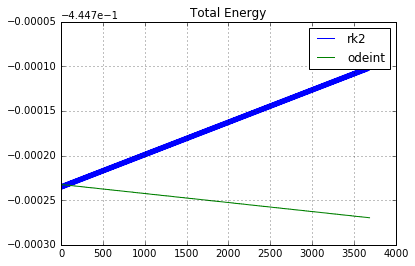

In [9]:
#Comportement energetique des differents integrateurs
Hrk2 = np.array([H(xs) for xs in rk2_states])
plt.plot(rk2_times,Hrk2,label='rk2')
plt.plot(times, Harray,label='odeint')
plt.legend()
plt.grid()
plt.title('Total Energy')